In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_excel("People Charm_data.xlsx", sheet_name="Data")

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df[df.duplicated()]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


<strong>Drop Duplicate rows</strong>

In [8]:
df.drop_duplicates(inplace=True)

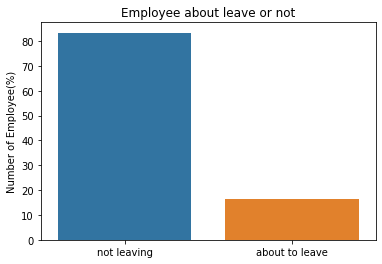

In [9]:
plt.subplot()
sns.barplot(x=df["left"].value_counts().keys(),y=df["left"].value_counts()/df["left"].value_counts().sum()*100)
plt.title("Employee about leave or not")
plt.ylabel("Number of Employee(%)")
plt.xticks(ticks=[0,1],labels=["not leaving","about to leave"])
plt.show()

<strong>Findings:-</strong>
- 20% employee is about to leave.

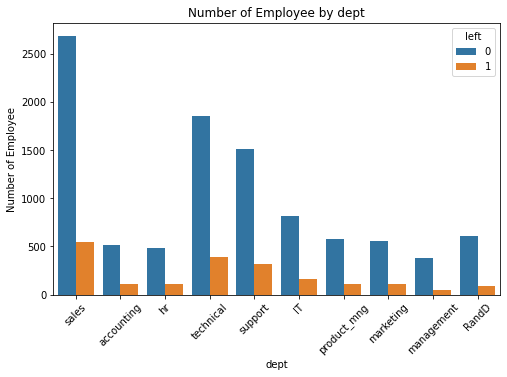

In [10]:
fig = plt.figure(figsize=(8,5))
plt.subplot()
sns.countplot(x=df["dept"],data=df, hue="left")
plt.title("Number of Employee by dept")
plt.ylabel("Number of Employee")
plt.xticks(rotation=45)
plt.show()

<strong>Findings:</strong>
- Sales,Techical and suppport dept has highest number of employees,
- Management dept has least number of employees.
- Sales,Techical and suppport dept has higher attrition rate

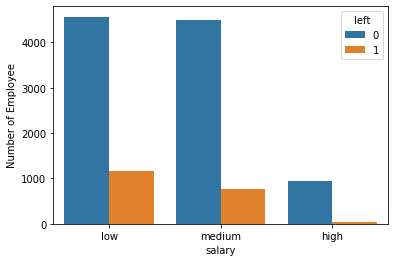

In [11]:
plt.subplot()
sns.countplot(x=df["salary"],data=df, hue="left")
plt.ylabel("Number of Employee")
plt.show()

<strong>Findings</strong>
- Attrition rate is high among low salary category Employees

In [12]:
data=df.groupby(df["promotionInLast5years"])["left"].count()

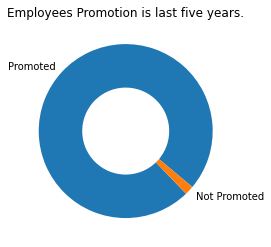

In [13]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,labels=["Promoted","Not Promoted"])
ax.set_title("Employees Promotion is last five years.")
plt.show()

<strong>Findings:</strong>
- Very Less number of people got promoted.

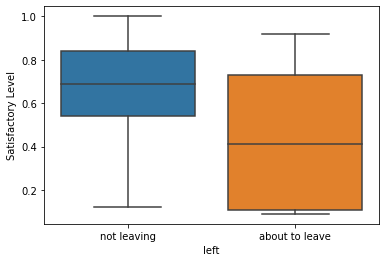

In [14]:
plt.subplot()
#sns.countplot(x=df["salary"],data=df, hue="left")
sns.boxplot(x=df["left"],y=df["satisfactoryLevel"])
plt.xticks(ticks=[0,1],labels=["not leaving","about to leave"])
plt.ylabel("Satisfactory Level")
plt.show()

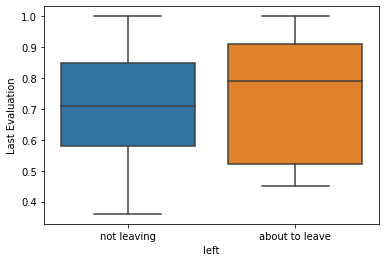

In [15]:
plt.subplot()
#sns.countplot(x=df["salary"],data=df, hue="left")
sns.boxplot(x=df["left"],y=df["lastEvaluation"],)
plt.xticks(ticks=[0,1],labels=["not leaving","about to leave"])
plt.ylabel("Last Evaluation")
plt.show()

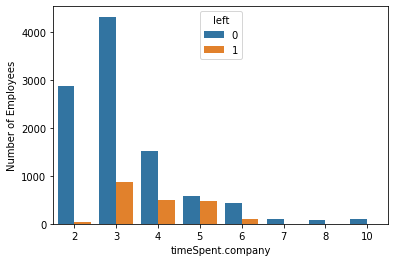

In [16]:
plt.subplot()
sns.countplot(x=df["timeSpent.company"],data=df, hue="left")
plt.ylabel("Number of Employees")
plt.xlabel("timeSpent.company")
plt.show()

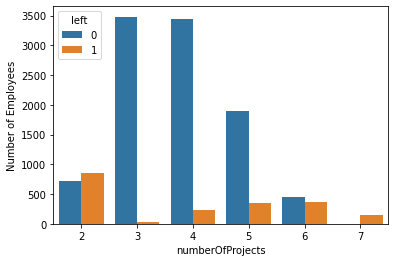

In [17]:
plt.subplot()
sns.countplot(x=df["numberOfProjects"],data=df, hue="left")
plt.ylabel("Number of Employees")
plt.xlabel("numberOfProjects")
plt.show()

In [18]:
df.corr()["left"]

satisfactoryLevel       -0.350558
lastEvaluation           0.013520
numberOfProjects         0.030928
avgMonthlyHours          0.070409
timeSpent.company        0.173295
workAccident            -0.125436
left                     1.000000
promotionInLast5years   -0.044657
Name: left, dtype: float64

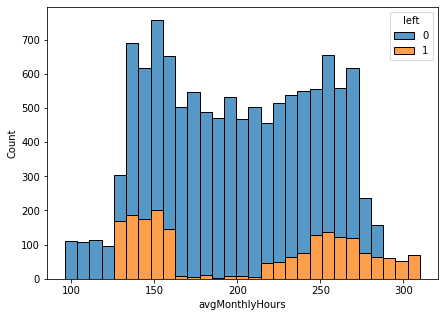

In [19]:
fig = plt.subplots(figsize=(7,5))
sns.histplot(data=df, x="avgMonthlyHours", hue="left", multiple="stack")
plt.show()

<strong>All Varibales impact on attrition rate</strong>

In [20]:
columns=['numberOfProjects', 'timeSpent.company', 'workAccident','promotionInLast5years', 'dept', 'salary']

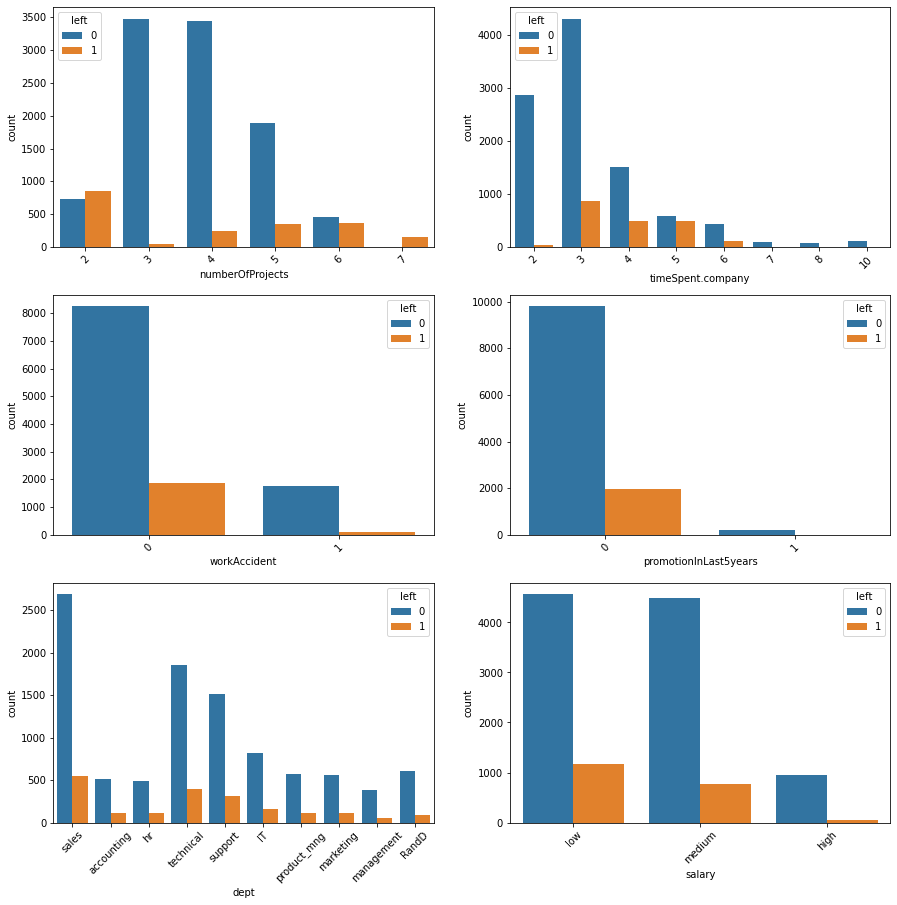

In [21]:
fig = plt.subplots(3,2,figsize=(15,15))
for index,name in enumerate(columns):
    plt.subplot(3,2,index+1)
    sns.countplot(x=df[name], hue="left",data=df)
    plt.xticks(rotation=45)

In [22]:
columns1 = ["satisfactoryLevel","lastEvaluation","timeSpent.company","avgMonthlyHours"]

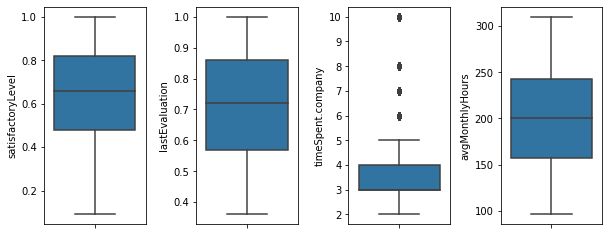

In [23]:
fig = plt.subplots(1,4,figsize=(10,4))
for index,name in enumerate(columns1):
    plt.subplot(1,4,index+1)
    sns.boxplot(y=df[name])
    plt.subplots_adjust(wspace=0.5)

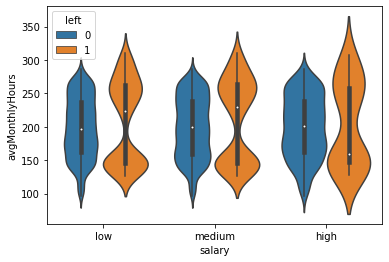

In [35]:
plt.subplot()
sns.violinplot(x="salary",y="avgMonthlyHours",data=df, hue="left")
plt.show()